Linear Regression
Basic implementation of simple linear regression using the least squares method

In [ ]:
import numpy as np

class LinearRegression:
  def __init__(self):
    self.slope = None # m
    self.intercept = None # b

  def fit(self, X, y):
    n = X.shape[0] # or we can also take len(X)
    x_mean = np.mean(X)
    y_mean = np.mean(y)

    num = 0
    den = 0

    for i in range(n):
      num = num + ((X[i] - x_mean) * (y[i] - y_mean))
      den = den + (X[i] - x_mean) ** 2

    self.slope = num / den
    self.intercept =  y_mean - (self.slope * x_mean)

  def predict(self, X):
    y_pred = []

    for x in X:
      y_pred.append(self.slope * x + self.intercept)
    return y_pred

In [ ]:
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])
lr = LinearRegression()
lr.fit(X,y)
print('Slope (m) = ', lr.slope)
print('Intercept (b) = ', lr.intercept)
y_pred = lr.predict(X)
print('y_pred =', y_pred)


Slope (m) =  0.6
Intercept (b) =  2.2
y_pred = [2.8000000000000003, 3.4000000000000004, 4.0, 4.6, 5.2]


Vectorized formula

y = x.w

w = (X^T . X)^(-1) X^T . y

In [ ]:
class LinearRegression:
  def __init__(self):
    self.w = None

  def fit(self, X, y):
    n = X.shape[0]
    # Add bias term using column wise concatination X -> [1 X]
    X = np.c_[np.ones(n), X]
    self.w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

  def predict(self, X):
    # Add bias term using column wise concatination
    X = np.c_[np.ones(X.shape[0]), X]
    y_pred = X.dot(self.w)
    return y_pred

In [ ]:
# Create example input data
X = np.array([[2, 2], [4, 5], [7, 8]])
y = np.array([9, 17, 26])

lr = LinearRegression()
lr.fit(X, y)
print('w =', lr.w)
y_pred = lr.predict(X)
print('y_pred =', y_pred)

X_new = np.array([[10, 11], [13, 14]])
y_pred = lr.predict(X_new)
print('new_y_pred =', y_pred)

w = [3. 1. 2.]
y_pred = [ 9. 17. 26.]
new_y_pred = [35. 44.]


Improved version of LR using regularization, cost function, Gradient descent

In [ ]:
import numpy as np

class LinearRegressionGD:
  def __init__(self, regularization = 0):
    self.regularization = regularization
    self.W = None

  def fit(self, X, y, lr = 0.01, epochs = 1000):
    # X: n x d
    # Add bias term to X using column wise concatination
    X = np.c_[np.ones(X.shape[0]), X]

    # Take W with all zeros in d dimensions
    self.W = np.zeros(X.shape[1])

    for i in range(epochs):

      # cal the predicted y value
      y_pred = np.dot(X, self.W)

      # cal the cost function using ridge regression loss function
      cost = np.sum(y_pred - y) ** 2 + self.regularization * np.sum(self.W) ** 2

      # cal gradient descent
      gradient = 2 * np.dot(X.T, (y_pred - y)) + 2 * self.regularization * self.W

      # update W
      self.W = self.W - lr * gradient

      if (i % 1000 == 0):
        print('cost after 1000 epochs =', cost)

  def predict(self, X):
    # Add bias term to X
    X = np.c_[np.ones(X.shape[0]), X]
    y_pred = np.dot(X, self.W)
    return y_pred


In [ ]:
X = np.array([[1, 2, 3, 4, 5]]).T
y = np.array([2, 4, 5, 4, 5])
lr = LinearRegressionGD(regularization = 0.1)
lr.fit(X, y, lr=0.01, epochs=10000)
print('W =', lr.W)
y_pred = lr.predict(X)
print('y_pred =', y_pred)

cost after 1000 epochs = 400.0
cost after 1000 epochs = 0.743878437665564
cost after 1000 epochs = 0.7438784380617116
cost after 1000 epochs = 0.7438784380617116
cost after 1000 epochs = 0.7438784380617116
cost after 1000 epochs = 0.7438784380617116
cost after 1000 epochs = 0.7438784380617116
cost after 1000 epochs = 0.7438784380617116
cost after 1000 epochs = 0.7438784380617116
cost after 1000 epochs = 0.7438784380617116
W = [1.99964292 0.65345474]
y_pred = [2.65309766 3.3065524  3.96000714 4.61346188 5.26691662]


The model is converging:

    The cost function initially decreases rapidly, indicating that the gradient descent is working.
    After some point, the cost stops decreasing, which suggests that the model has reached a minimum (either global or local).

Gradient updates are very small:

    The last few values are almost identical, meaning the weight updates are too small to change the cost.
    This usually happens when the model has learned well or reached numerical precision limits.

Possible early stopping point:

    Since the cost is no longer improving, continuing training won’t help.
    You could add an early stopping condition (e.g., stop training if the cost changes by less than a small threshold like 10−610−6).

Visualization

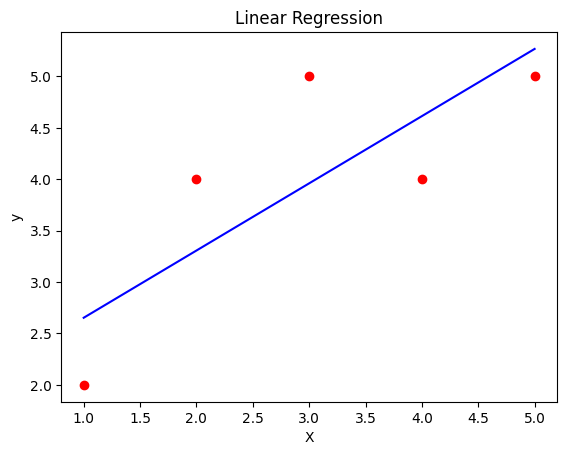

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color = 'red')
plt.plot(X, y_pred, color = 'blue')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()